In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Importing and Knowing the data
df=pd.read_csv("heart.csv")

#Picking top rows to check the datatype
df.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [39]:
#shape of array
df.shape

(303, 14)

In [40]:
df.info()
##Data cleaning
#type of variable
#df.nunique()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [41]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [42]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
#data characters mistakes
df['ca'].unique()
df.ca.value_counts()
df[df['ca'] == 4] 

df.loc[df['ca'] == 4, 'ca'] = np.NaN
df['ca'].unique()

df.thal.value_counts()
df[df['thal'] == 0] 

df.loc[df['thal'] == 0, 'thal'] = np.NaN
df['thal'].unique()

df = df.fillna(df.median())  # Replacing with Mean
df.isnull().sum()            # Any missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

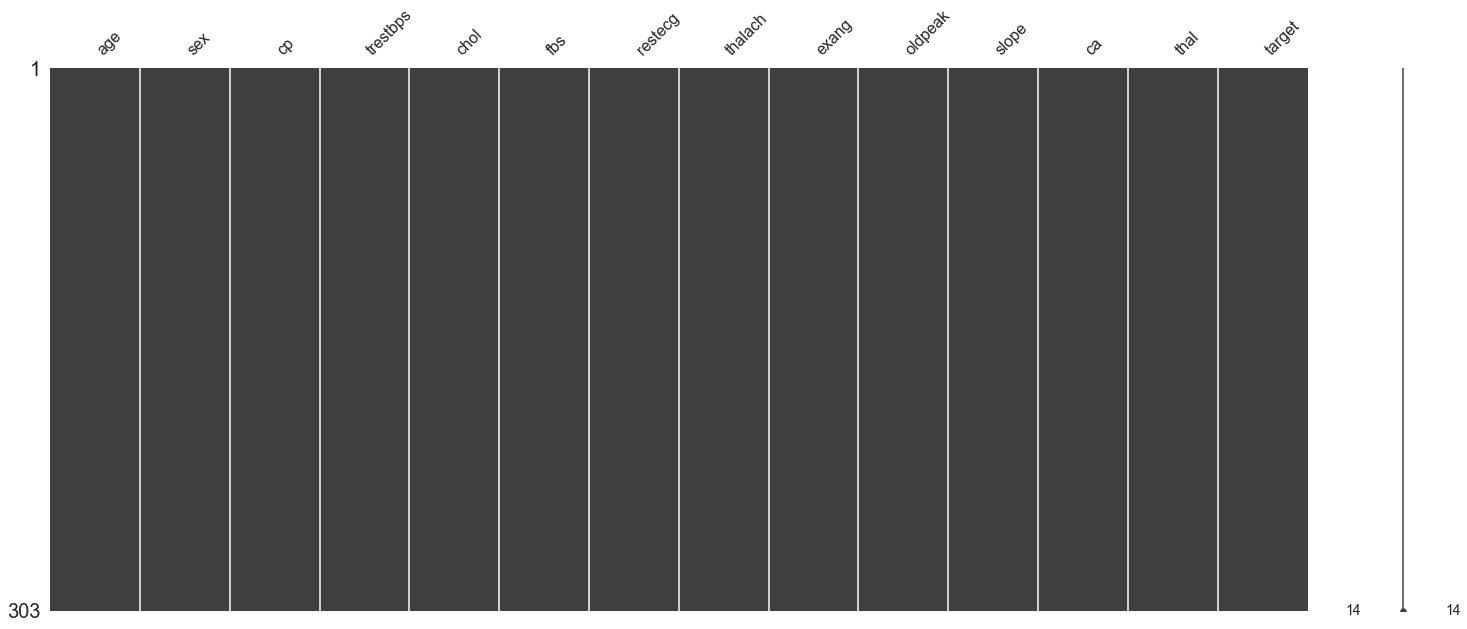

In [44]:
msno.matrix(df)

In [45]:
#duplicate rows
duplicated = df.duplicated().sum()
if duplicated:
  print("Duplicate rows in Dataset are {}".format(duplicated))
else:
  print("Dataset contains no duplicate values") 
duplicated = df[df.duplicated(keep=False)]
duplicated.head() 

Duplicate rows in Dataset are 1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [46]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


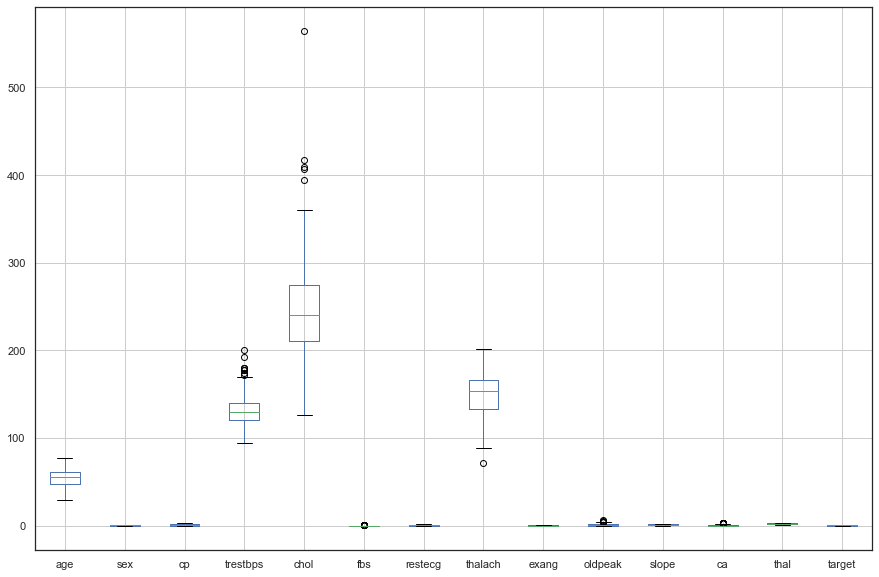

In [47]:
df.boxplot()

In [49]:
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])
outliers(df[continous_features], drop=True)

print(df.target.value_counts())

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5
Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed
1    159
0    125
Name: target, dtype: int64


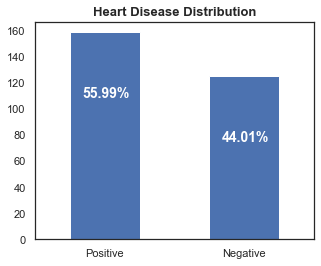

In [50]:
fig, ax = plt.subplots(figsize=(5,4))
name = ["Positive", "Negative"]
ax = df.target.value_counts().plot(kind='bar')

ax.set_title("Heart Disease Distribution", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
 

C:\Users\lenovo\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:2882: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



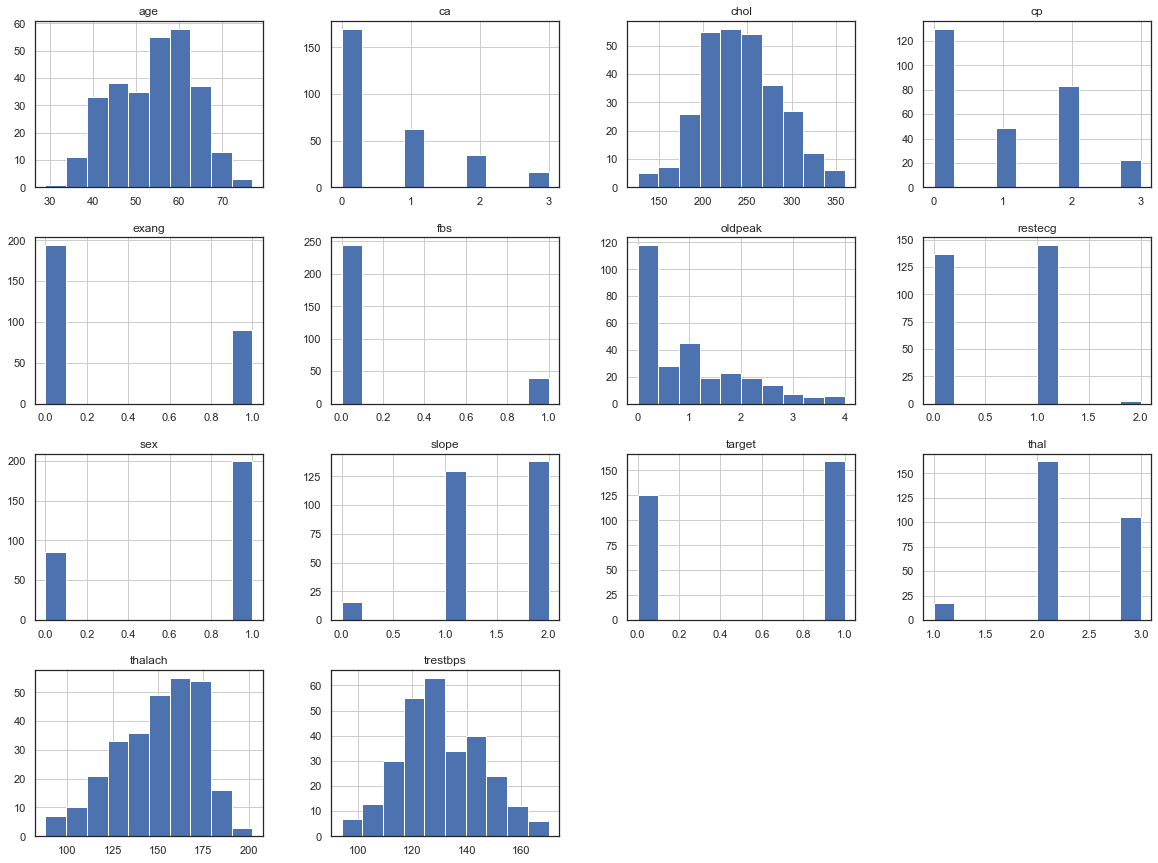

In [51]:
#bargrapgh_eda_dist
fig=plt.figure(figsize=(20,15))
ax=fig.gca()
df.hist(ax=ax)
plt.show()

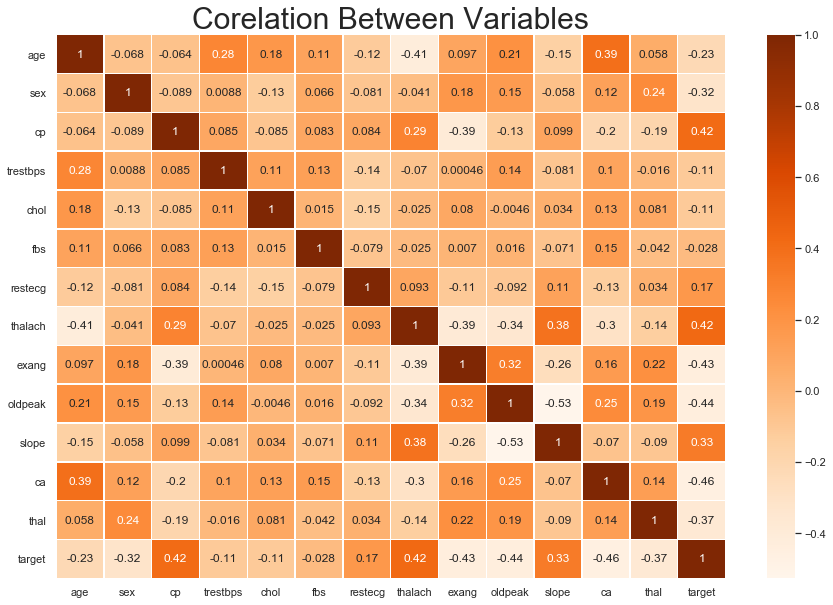

In [52]:
#corelation heat map
#df['target'] = df.target.replace({1: "Positive", 0: "Negative"})
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Oranges")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [53]:
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler and apply it to the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(y_train)

[[ 1.11256297  0.68313005 -0.93162467 ... -0.70939329  1.58553771
  -2.19433456]
 [-0.3955175  -1.46385011  0.07088449 ...  0.94307578 -0.70596934
  -0.51031036]
 [-2.011318    0.68313005 -0.93162467 ...  0.94307578 -0.70596934
   1.17371384]
 ...
 [ 0.03536264 -1.46385011  1.07339364 ...  0.94307578 -0.70596934
  -0.51031036]
 [-0.0723574  -1.46385011 -0.93162467 ...  0.94307578 -0.70596934
  -0.51031036]
 [-1.14955773  0.68313005 -0.93162467 ... -0.70939329 -0.70596934
   1.17371384]]
242    0
108    1
239    0
73     1
255    0
236    0
194    0
292    0
196    0
35     1
86     1
142    1
62     1
295    0
283    0
22     1
31     1
245    0
17     1
58     1
77     1
141    1
161    1
151    1
115    1
195    0
4      1
100    1
159    1
63     1
      ..
173    0
148    1
275    0
153    1
280    0
183    0
104    1
205    0
258    0
121    1
74     1
26     1
171    0
290    0
180    0
293    0
41     1
199    0
91     1
72     1
90     1
257    0
219    0
10     1
201    0
268 

In [68]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=100)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8636363636363636
Accuracy for test set for Logistic Regression = 0.8604651162790697


In [69]:
cm_test

array([[31,  2],
       [10, 43]], dtype=int64)

In [70]:
import sklearn
# K-folds Cross Validation, using K=10, Random Forest Classifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75       0.75       0.7        0.9        0.85       0.8
 0.8        0.7        0.78947368 0.89473684]
Mean: 0.7934210526315789
Standard Deviation: 0.06793603395210289


In [71]:
import sklearn
# K-folds Cross Validation, using K=10, Logistic Regression Classifier
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
LogReg_clf = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score

scores_log = cross_val_score(LogReg_clf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_log)
print("Mean:", scores_log.mean())
print("Standard Deviation:", scores_log.std())

Scores: [0.85       0.8        0.75       0.9        0.85       0.85
 0.85       0.9        0.78947368 0.89473684]
Mean: 0.843421052631579
Standard Deviation: 0.04767808139998273


In [72]:
import sklearn
# K-folds Cross Validation, using K=10, KNearest Neighbour Classifier
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
kNearest_clf = KNeighborsClassifier(n_neighbors = 3)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score

scores_log = cross_val_score(kNearest_clf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_log)
print("Mean:", scores_log.mean())
print("Standard Deviation:", scores_log.std())

Scores: [0.8        0.7        0.75       0.9        0.85       0.75
 0.8        0.75       0.73684211 0.89473684]
Mean: 0.7931578947368421
Standard Deviation: 0.06518883713899665


In [73]:
import sklearn
# K-folds Cross Validation, using K=10, Gaussian Naive Bayes
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
gaussianNaive_clf = GaussianNB()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score

scores_log = cross_val_score(gaussianNaive_clf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_log)
print("Mean:", scores_log.mean())
print("Standard Deviation:", scores_log.std())

Scores: [0.95       0.85       0.75       0.9        0.9        0.75
 0.9        0.7        0.73684211 0.89473684]
Mean: 0.8331578947368421
Standard Deviation: 0.08483485668395543


In [74]:
import sklearn
# K-folds Cross Validation, using K=10, Linear Support Vector Machine
from sklearn.svm import LinearSVC
linearSupportVM_clf = LinearSVC()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

scores_log = cross_val_score(linearSupportVM_clf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_log)
print("Mean:", scores_log.mean())
print("Standard Deviation:", scores_log.std())

Scores: [0.85       0.8        0.75       0.9        0.85       0.85
 0.85       0.9        0.78947368 0.89473684]
Mean: 0.843421052631579
Standard Deviation: 0.04767808139998273


In [75]:
import sklearn
# K-folds Cross Validation, using K=10, Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisionTree_clf = DecisionTreeClassifier()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

scores_log = cross_val_score(decisionTree_clf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_log)
print("Mean:", scores_log.mean())
print("Standard Deviation:", scores_log.std())

Scores: [0.75       0.7        0.65       0.85       0.8        0.65
 0.8        0.75       0.68421053 0.94736842]
Mean: 0.7581578947368421
Standard Deviation: 0.08950812030820461


In [76]:
#Model #1: Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)

In [77]:
#Model #2: Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log_test = round(logreg.score(X_test, y_test) * 100, 2)

In [78]:
#Model #3: K Nearest Neighbor:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)

In [79]:
#Model #4: Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)

In [80]:
#Model #5: Linear Support Vector Machine:

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc_test = round(linear_svc.score(X_test, y_test) * 100, 2)

In [81]:
#Model #6: Decision Tree:

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)

In [82]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 
              'KNeighborsClassifier',
              'Gaussian Naive Bayes',
              'Linear Support Vector Machine',
              'Decision Tree'],
    'Score': [acc_log, 
              acc_random_forest,
              acc_knn,
              acc_gaussian,
              acc_linear_svc,
              acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
86.87,Linear Support Vector Machine
86.36,Logistic Regression
85.35,KNeighborsClassifier
84.34,Gaussian Naive Bayes


In [83]:
results1 = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 
              'KNeighborsClassifier',
              'Gaussian Naive Bayes',
              'Linear Support Vector Machine',
              'Decision Tree'],
    'Train Score': [acc_log, 
              acc_random_forest,
              acc_knn,
              acc_gaussian,
              acc_linear_svc,
              acc_decision_tree],
    'Test Score': [acc_log_test, 
              acc_random_forest_test,
              acc_knn_test,
              acc_gaussian_test,
              acc_linear_svc_test,
              acc_decision_tree_test]})

result_df1 = results1.sort_values(by='Test Score', ascending=False)
result_df1 = result_df1.set_index('Model')
result_df1.head(6)

,Train Score,Test Score
Model,,
Logistic Regression,86.36,86.05
Linear Support Vector Machine,86.87,86.05
Gaussian Naive Bayes,84.34,82.56
Random Forest,100.00,81.40
KNeighborsClassifier,85.35,79.07
Decision Tree,100.00,73.26


In [85]:
from sklearn.metrics import f1_score,precision_score,recall_score

In [86]:
from sklearn.metrics import confusion_matrix

In [96]:
#Logistic Regression

In [138]:
tn, fp, fn, tp=confusion_matrix(logreg.predict(X_test),y_test).ravel()
print(confusion_matrix(y_test,logreg.predict(X_test)))
recall_scr_log=tp/(tp+fp)
precision_scr_log=tp/(tp+fn)
F1_score_log=(2*precision_scr_log*recall_scr_log)/(precision_scr_log+recall_scr_log)
print("Precision is ",precision_scr_log)
print("Recall is ",recall_scr_log)
print("F1 score is ",F1_score_log)

[[31 10]
 [ 2 43]]
Precision is  0.8113207547169812
Recall is  0.9555555555555556
F1 score is  0.8775510204081634


In [139]:
#precision and recall both should be high
#higher the f1 score better is the model

In [140]:
#Linear SVM

In [141]:
tn, fp, fn, tp=confusion_matrix(linear_svc.predict(X_test),y_test).ravel()
print(confusion_matrix(y_test,linear_svc.predict(X_test)))
recall_scr_svm=tp/(tp+fp)
precision_svm=tp/(tp+fn)
F1_score_svm=(2*precision_svm*recall_scr_svm)/(precision_svm+recall_scr_svm)
print("Precision is ",precision_svm)
print("Recall is ",recall_scr_svm)
print("F1 score is ",F1_score_svm)

[[31 10]
 [ 2 43]]
Precision is  0.8113207547169812
Recall is  0.9555555555555556
F1 score is  0.8775510204081634


In [142]:
#Gaussian

In [143]:
tn, fp, fn, tp=confusion_matrix(gaussian.predict(X_test),y_test).ravel()
print(confusion_matrix(y_test,gaussian.predict(X_test)))
recall_scr_gaus=tp/(tp+fp)
precision_scr_gaus=tp/(tp+fn)
F1_score_gaus=(2*precision_scr_gaus*recall_scr_gaus)/(precision_scr+recall_scr_gaus)
print("Precision is ",precision_scr_gaus)
print("Recall is ",recall_scr_gaus)
print("F1 score is ",F1_score_gaus)

[[30 11]
 [ 4 41]]
Precision is  0.7884615384615384
Recall is  0.9111111111111111
F1 score is  0.834141637330537


In [144]:
results_final = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Gaussian Naive Bayes',
              'Linear Support Vector Machine',
             ],
    'Recall Score': [recall_scr_log, 
              recall_scr_gaus,
              recall_scr_svm],
    'Precision Score': [precision_scr_log, 
              precision_scr_gaus,
              precision_svm],
    'F1 Score': [F1_score_log, 
              F1_score_gaus,
              F1_score_svm],})

result_final = results_final.sort_values(by='F1 Score', ascending=False)
result_final = result_final.set_index('Model')
result_final.head(3)

,Recall Score,Precision Score,F1 Score
Model,,,
Logistic Regression,0.955556,0.811321,0.877551
Linear Support Vector Machine,0.955556,0.811321,0.877551
Gaussian Naive Bayes,0.911111,0.788462,0.834142


In [145]:
results1.head(6)

,Model,Train Score,Test Score
0,Logistic Regression,86.36,86.05
1,Random Forest,100.00,81.40
2,KNeighborsClassifier,85.35,79.07
3,Gaussian Naive Bayes,84.34,82.56
4,Linear Support Vector Machine,86.87,86.05
5,Decision Tree,100.00,73.26


In [135]:
# Save the model as serialized object pickle
import pickle

with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)